# Predicting car prices

In this project, we will be using machine learning alogorithm to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. More detailed description about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile) can be downloaded from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

Lets start by reading the dataset and doing basic exploration. This data set contains lot of columns but don't have a dedicated header row. We will name the columns based on what we discovered about them at the source

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [3]:
cars.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul



The dataset contains several columns which are not numerical in nature. Our machine learning algorithm can only work with numerical values and thus, keeping some of these columns is not useful as they cannot be used as features. Lets go ahead and keep only numerical columns which can be input to our system

More information about the dataset and columns are [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names) https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

In [5]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width',
                          'height', 'curb-weight', 'bore', 'stroke',
                          'compression-rate', 'horsepower', 'peak-rpm', 
                          'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [6]:
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.3,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.0,160,5500,16,22,?


In [7]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


## Create dataset

### Step 1 - Replace `?` with np.nan
Our machine learning predictive model won't work with dataset if it has any missing values. Looking at the sample data displayed above, there are several rows of `normalized-losses` column which contains `?` mark. We will replace `?` with np.nan

In [8]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.3,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.0,160,5500,16,22,NaN


### Step 2 - Convert all columns to float values. 

converting all the columns to float values will allow us to scale them to values between 0 to 1. Rescaling this will retains the distribution properties and allows us to work with numbers which are between known limits

In [9]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
6,158.0,105.8,192.7,71.4,55.7,2844.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
8,158.0,105.8,192.7,71.4,55.9,3086.0,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.0
9,NaN,99.5,178.2,67.9,52.0,3053.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN


We can see that columns like `horsepowe` is now float

### Step 3 - remove all rows with null in `price` column

We will be using `price` column to predict car prices. SO it is important that this column contains no null. If there are any rows with missing values in `price` column, those rows are not useful to us. Lets first check how much such rows are there and if the number is small lets remove them


In [10]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
numeric_cars.isnull().sum()["price"]/numeric_cars.shape[0] *100

1.951219512195122

Thankfully only four rows, which is less than 2%, of the `price` column have null values. we can safely remove them

In [12]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

### Step 4 - replace null in remaining columns with respective column's mean value

Replace missing values in other columns using column means and confirm that there's no more missing values!

In [13]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Step 5 - Normalize all columns

Lets normalize all columns excep `price` column. We can save `price` column data, use dataframe level methods to normalize all columns and then replace the `price` column with original data 

In [14]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.08125,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.11250,0.247664,0.673469,0.277778,0.342105,16430.0


# Univariate Model¶

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure our code workflow and understand the dataset features better.

We will create a function, named knn_train_test() that encapsulates the training and simple validation process. It will
   - split the data set into a training and test set
   - fit the KNeighborsRegressor model on the training set, and make predictions on the test set.
   - calculate the RMSE and return that value

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def divide_train_test(df, divide_by = 2):
     #lets shuffel the dataset so that we can get random set of rows in test 
    #training datsets
    index_permutation = np.random.permutation(df.index)
    randomized_df = df.reindex(index_permutation)
    
    # lets divide the df into two equal part, one for training and another for
    #testing
    upto = int(len(randomized_df)/divide_by)
    training_df = randomized_df[:upto]
    test_df = randomized_df[upto:]
    return training_df, test_df

def knn_train_test(df, training_df, training_col, test_df, target_col, k = 5):
    knn_model = KNeighborsRegressor(n_neighbors = k)
    np.random.seed(1)   
    
    if isinstance(training_col, str):
        #quickly get a list out of training_col
        #we know the columns cannot contain some random chars :)
        #but split will quickly convert string to list
        training_col = training_col.split(",!,!,!,!,&.1!")
        
    
    #lets fit KNeigborsRegressor model and predict 
    knn_model.fit(training_df[training_col],training_df[target_col])
    prediction = knn_model.predict(test_df[training_col])
    
    #lets calculate RMSE
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = np.sqrt(mse)
    return rmse   


    

Now that we have the function, we can train the same using various numeric columns in our dataset. Our goal is to find out, which feature(column) provides us best prediction using the defaul value for **`k`**

In [16]:
def test_features(df, target_col, k=None, features = None, univariate = True,
                 key = None):
    rmse_results = {}
    if features is None:
        features = df.columns.drop(target_col)
    training_df, test_df = divide_train_test(df)
    # if no k value provided set to default 5
    if k == None:
        k = [5]  
    k_rmses = {}
    if univariate :
        # we model the provided features one by one
        for feature in features:
            key_dict = feature
            if key != None:
                key_dict = key  
            k_rmses = {}
            for k_val in k:
                k_rmses[k_val] = knn_train_test(df, 
                                                training_df, feature,
                                                test_df, target_col, k_val) 

            rmse_results[key_dict] = k_rmses
        return k, rmse_results
    else:
        # multivariate. We will model with all the provided features
        k_rmses = {}
        for k_val in k:
            k_rmses[k_val] = knn_train_test(df,
                                            training_df, features,
                                            test_df, target_col, k_val) 
            
            key_dict = ",".join(features)
            if key != None:
                key_dict = key 
            rmse_results[key_dict] = k_rmses
        return k, rmse_results

In [17]:
k, rmse_results = test_features(numeric_cars, "price")
rmse_results

{'bore': {5: 6565.266404192584},
 'city-mpg': {5: 4640.642228855573},
 'compression-rate': {5: 6527.8840071717805},
 'curb-weight': {5: 4097.614100574592},
 'height': {5: 7632.761800694334},
 'highway-mpg': {5: 4108.248640079233},
 'horsepower': {5: 3986.1585206912187},
 'length': {5: 4872.16726972283},
 'normalized-losses': {5: 7354.233198762614},
 'peak-rpm': {5: 8925.918849403606},
 'stroke': {5: 7049.886829117638},
 'wheel-base': {5: 5505.602732266882},
 'width': {5: 3983.6094772613856}}

### Checking impact of `k` on prediction

We have used the `KNeighborsRegressor` model with default neighbor count (k) of 5. The value of `k` can have lot of impact on how the prediction works. Lets use our functions to test predicton for k values [1, 3, 5, 7, 9]

In [18]:
k = [1, 3, 5, 7, 9]
k, k_rmse_results = test_features(numeric_cars, "price", k = k)
k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

Now we can use this data to plot and visualize how RMSE values vary based on various k values

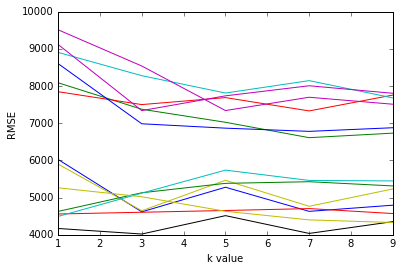

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

for key in k_rmse_results:
    v = k_rmse_results[key]    
    x = sorted(v)
    y = list(v.values())
    plt.plot(x,y, label = key) 
plt.xlabel('k value')
plt.ylabel('RMSE')




# Multivariate Model¶

We can now use our functions created above to model multi features. Before we do that first lets find the average rmse for various values of `k` we calculated earlier

In [20]:
def get_feature_avg_rmse(k_rmse_results):
    feature_avg_rmse = {}
    for k,v in k_rmse_results.items():
        avg_rmse = np.mean(list(v.values()))
        feature_avg_rmse[k] = avg_rmse
    return feature_avg_rmse


In [21]:
feature_avg_rmse = get_feature_avg_rmse(k_rmse_results)
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

### Multivariage model with `k` = 5

First lets create a function to test multivariate model. We have everything already setup. We just need to send right combination of parameters to test_features function

In [22]:
def test_multivariate(k = [5]):  
    k_rmse_results_multi = {}
    two_best_features = ['horsepower', 'width']
    k, k_rmse_results = test_features(numeric_cars, "price",
                                      features= two_best_features,
                                     univariate = False,
                                     key ='two best features', k = k)
    k_rmse_results_multi.update(k_rmse_results)

    three_best_features  = ['horsepower', 'width', 'curb-weight']
    k, k_rmse_results = test_features(numeric_cars, "price",
                                      features= three_best_features,
                                     univariate = False,
                                     key ='three best features', k = k )
    k_rmse_results_multi.update(k_rmse_results)

    four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
    k, k_rmse_results = test_features(numeric_cars, "price",
                                      features= four_best_features ,
                                     univariate = False,
                                     key ='four best features', k = k )
    k_rmse_results_multi.update(k_rmse_results)

    five_best_features = ['horsepower', 'width', 'curb-weight' , 
                          'city-mpg' , 'highway-mpg']
    k, k_rmse_results = test_features(numeric_cars, "price",
                                      features= five_best_features,
                                     univariate = False,
                                     key ='five best features', k = k )
    k_rmse_results_multi.update(k_rmse_results)

    six_best_features = ['horsepower', 'width', 'curb-weight' , 
                         'city-mpg' , 'highway-mpg', 'length']
    k, k_rmse_results = test_features(numeric_cars, "price",
                                      features= six_best_features,
                                     univariate = False,
                                     key ='six best features', k = k )
    k_rmse_results_multi.update(k_rmse_results)


    return k_rmse_results_multi

In [23]:
k_rmse_results_multi = test_multivariate()
k_rmse_results_multi

{'five best features': {5: 3341.6024539726504},
 'four best features': {5: 3280.3807311630976},
 'six best features': {5: 3628.261188214127},
 'three best features': {5: 3305.9401397969677},
 'two best features': {5: 3589.3132622073304}}

### Multivariate model with `k` = 1 to 25

We can use the same test_multivariate with right k value 

In [24]:
#generate k value from 1 to 25 and call test_multivariate with k list
k = [i for i in range(1,25)]
k_rmse_results_multi = test_multivariate(k)
k_rmse_results_multi


{'five best features': {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.520542998191,
  7: 3817.290452118825,
  8: 4004.414529685573,
  9: 3992.3186041830318,
  10: 4138.728787853335,
  11: 4342.052852829098,
  12: 4416.145381031136,
  13: 4493.8798141857205,
  14: 4463.501601554571,
  15: 4474.480783207805,
  16: 4553.5595362768345,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.900893982822,
  20: 4712.022985543165,
  21: 4755.856625823773,
  22: 4788.162720030673,
  23: 4806.923381965054,
  24: 4879.983352195467},
 'four best features': {1: 2516.589279950226,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.269482641261,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.998621362245,
  10: 4042.247226187899,
  11: 4230.335248684068,
  12: 4354.008675154061,
  13: 4461.626664877788,
  14: 4468.029845088927,
  15: 444

### Plot multivariate model output for various k values

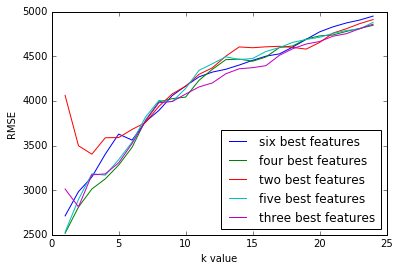

In [25]:
for k,v in k_rmse_results_multi.items():
    x = list(v.keys())
    y = list(v.values())    
    plt.plot(x,y, label = k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.legend(loc="lower right")